In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [8]:
my_data = pd.concat([x_df,y_df],axis=1)

In [10]:
my_data.head()

X Data         Y
0  0.00000  3.708391
1  0.00001  5.029634
2  0.00002  4.381490
3  0.00003  4.431109
4  0.00004  4.958924

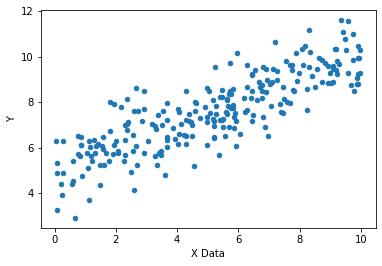

In [11]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y= 'Y')

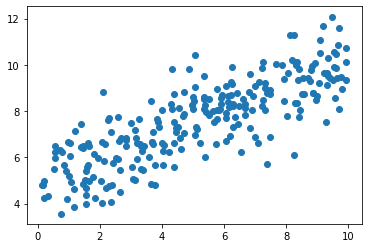

In [15]:
aux_plot = my_data.sample(n=250)
plt.scatter(aux_plot['X Data'],aux_plot.Y)

In [16]:
batch_size = 8

In [17]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [18]:
xph = tf.placeholder(tf.float32,[batch_size])

In [19]:
yph = tf.placeholder(tf.float32,[batch_size])

In [20]:
y_model = m*xph + b

In [21]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.001)
train = optimizer.minimize(error)

In [23]:
init = tf.global_variables_initializer()

In [24]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [25]:
model_m

0.51327133

In [26]:
model_b

4.937549

In [27]:
y_hat = x_data*model_m + model_b

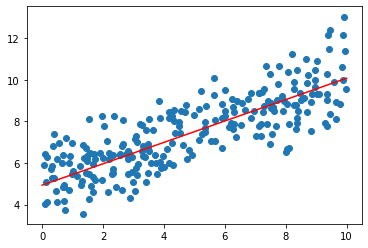

In [28]:
aux_plot = my_data.sample(n=250)
plt.scatter(aux_plot['X Data'],aux_plot.Y)
plt.plot(x_data,y_hat,'r')